## Comparing the proportion of rhyming lines

In this notebook, we will use the metric rhymes() defined in
lyrics_analysis.evaluation to compare the number of rhyming lines. We
will compare lyrics divided by two criteria: first, we will compare
individual genres, and second, we will compare actual song lyrics
to lyrics with randomly shuffled lines.

The rhymes() metric calculates the proportion of lines that rhyme
with the previous line. This means that a song where first line rhymes
with the second, the third one with the fourth one etc. would get 
a score of 0.5.

The rhymes() function takes two parameters: song lyrics and rhyme_level,
which is an integer indicating how many phonemes have to be identical
for the words to be considered rhymes. The default is 2.

In [1]:
import ijson
import lyrics_analysis.evaluation
import matplotlib.pyplot as plt
%matplotlib inline

Define a generator that will retrieve song lyrics and its genre
from a file.

In [2]:
import ijson

def retrieve_lyrics_and_genre(file):
    with open(file) as f:
        songs = ijson.items(f, 'item')
        for song in songs:
            yield song["lyrics"], song["genre"]
            

Define a dictionary that will store the scores.

In [3]:
scores_by_genre = {
    "rap": [],
    "pop": [],
    "rock": [],
    "r-b": [],
    "country": []
}

Now, parse the randomly selected set of n=10,000 songs and calculate
the proportion of rhymes for each one.

In [4]:
for lyrics, genre in retrieve_lyrics_and_genre("../data/cleaned/eval_set_10000_lyrics.json"):
    score = lyrics_analysis.evaluation.rhymes(lyrics)
    scores_by_genre[genre].append(score)
    

Let's look at the average score for each genre.

In [7]:
for genre, scores in scores_by_genre.items():
    print(genre, sum(scores)/len(scores))
    

rap 0.11459709186402002
pop 0.11883784808255476
rock 0.1014088209672663
r-b 0.11662323690266674
country 0.08882077816812806


Now, let's plot a histogram to see if there are any significant
differences.

Text(0, 0.5, 'n')

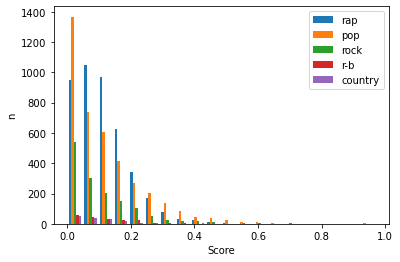

In [8]:
n_bins = 20
genres = ["rap", "pop", "rock", "r-b", "country"]
data = [scores_by_genre[genre] for genre in genres]
plt.hist(data, bins=n_bins)
plt.legend(genres)
plt.xlabel("Score")
plt.ylabel("n")

Now, let's compare song lyrics in the correct order to shuffled lyrics.

In [10]:
song_scores = scores_by_genre["rap"]\
            + scores_by_genre["pop"]\
            + scores_by_genre["rock"]\
            + scores_by_genre["r-b"]\
            + scores_by_genre["country"]
            

In [11]:
shuffled_scores = []
for lyrics, _ in retrieve_lyrics_and_genre("../data/cleaned/eval_set_10000_lyrics_shuffled.json"):
    shuffled_scores.append(lyrics_analysis.evaluation.rhymes(lyrics))


Finally, plot a histogram that compares the scores of original and
shuffled song lyrics.

Text(0, 0.5, 'n')

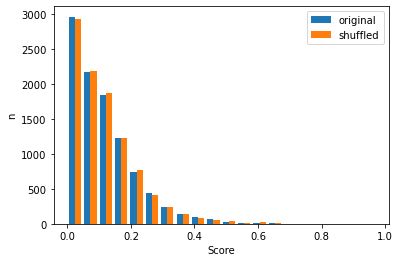

In [12]:
n_bins = 20
plt.hist([song_scores, shuffled_scores], bins=n_bins)
plt.legend(["original", "shuffled"])
plt.xlabel("Score")
plt.ylabel("n")